# **Data Mining Final Project Report - By Anusha Dasari**

### <u>Abstract</u>
<i>Data mining is a process of analysing and understanding the data through cleaning raw data, identifying useful patterns, creating models, testing the models, and predicting the outcomes. In this project various data mining techniques were used to analyse the data and have followed different approaches to increase the accuracy of predictions performed by the models. I have performed some analysis to check what set of features have high effect on accuracy score and have also done visualizations and statistical analysis to understand the data. By working on this project, I have learned how to use pipelines for my model and use multi-classifier models. Overall, I have improved on my data mining skills and hope I could find more deep information on the data by continuing my work on this project. 

### <u>Overview<u>

<i>Problem Statement</i>: The main objective of this project is do EDA and build model that could predict the outcomes without overfiiting or underfitting.
    
<i>Proposed Methodology</i>: Firstly, I intend to start with exploring and analysing the data and then build model that could accurately predict the outcomes. Finally, I intend to deploy the model using ONNX.


    
    
<i>Relevent literature</i>: Mentioned in References

### <u>Data Processing:</u>

<i>To start with the project, I have imported all the required libraries from python and have loaded the dataset to the notebook. Below table gives you first five records of the dataset. </i>

In [40]:
# Loading the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans

from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
import numpy
import onnxruntime as rt
from onnx.tools.net_drawer import GetPydotGraph, GetOpNodeProducer
import graphviz

from sklearn2pmml.pipeline import PMMLPipeline
from sklearn2pmml import sklearn2pmml
from sklearn_pandas import DataFrameMapper
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix



In [3]:
# Importing and displaying the records of the data
df=pd.read_csv("data_public.csv.gz")
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
0,231.420023,-12.210984,217.624839,-15.611916,140.047185,76.904999,131.591871,198.160805,82.873279,127.350084,224.592926,-5.992983,-14.689648,143.072058,153.439659,2
1,-38.019270,-14.195695,9.583547,22.293822,-25.578283,-18.373955,-0.094457,-33.711852,-8.356041,23.792402,4.199023,2.809159,-59.330681,-11.685950,1.317104,3
2,-39.197085,-20.418850,21.023083,19.790280,-25.902587,-19.189004,-2.953836,-25.299219,-6.612401,26.285392,5.911292,6.191587,-56.924996,-4.675187,-1.027830,2
3,221.630408,-5.785352,216.725322,-9.900781,126.795177,85.122288,108.857593,197.640135,82.560019,157.105143,212.989231,-3.621070,-15.469156,135.265859,149.212489,2
4,228.558412,-12.447710,204.637218,-13.277704,138.930529,91.101870,115.598954,209.300011,89.961688,130.299732,201.795100,-1.573922,-15.128603,148.368622,147.492663,3


<i>By visualizing this table, the feature variables are from "A" to "O" and the last column("Class") represents the label which the record is classified into.</i>


-------------

### <u>Data Analysis:</u>

In [8]:
# To find unique values of feature "Class"
df['Class'].unique()

array([2, 3, 1], dtype=int64)

<i>The dataset is classified into 3 lables : 1,2 and 3.</i>

In [5]:
# To check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 16 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   A       1200000 non-null  float64
 1   B       1200000 non-null  float64
 2   C       1200000 non-null  float64
 3   D       1200000 non-null  float64
 4   E       1200000 non-null  float64
 5   F       1200000 non-null  float64
 6   G       1200000 non-null  float64
 7   H       1200000 non-null  float64
 8   I       1200000 non-null  float64
 9   J       1200000 non-null  float64
 10  K       1200000 non-null  float64
 11  L       1200000 non-null  float64
 12  M       1200000 non-null  float64
 13  N       1200000 non-null  float64
 14  O       1200000 non-null  float64
 15  Class   1200000 non-null  int64  
dtypes: float64(15), int64(1)
memory usage: 146.5 MB


<i>As per the above table, the dataset has 1200000 records and 16 columns. Since, all the values in the dataset are numerical it makes the further analysis easier.</i>

In [9]:
# To get the summary statistics
df.describe()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
count,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06
mean,5.068656e+01,-1.883373e+01,7.162152e+01,-1.355120e+01,2.944177e+01,-6.185189e+00,3.174186e+01,5.112504e+01,3.300077e+01,4.092546e+01,7.938340e+01,-6.746540e+00,-4.232290e+01,4.949012e+01,5.980333e+01,2.167323e+00
std,1.292492e+02,1.446355e+01,1.052808e+02,4.689774e+01,7.282278e+01,7.309100e+01,6.660329e+01,1.034053e+02,4.217119e+01,7.694386e+01,9.484003e+01,1.557490e+01,1.791142e+01,6.728231e+01,6.677712e+01,6.874930e-01
min,-7.308940e+01,-8.322357e+01,-5.972853e+01,-1.375818e+02,-3.829826e+01,-1.485917e+02,-6.654137e+01,-4.246089e+01,-1.818542e+01,-1.123844e+02,-1.415233e+01,-6.271828e+01,-8.144988e+01,-2.057979e+01,-1.283059e+01,1.000000e+00
25%,-3.793679e+01,-1.786669e+01,7.553164e+00,-1.471337e+01,-2.436286e+01,-3.072492e+01,-3.484185e+00,-2.629661e+01,-7.594991e+00,2.108044e+01,2.419273e+00,-8.875128e+00,-5.567326e+01,-7.131906e+00,1.628438e-01,2.000000e+00
50%,-3.197847e+01,-1.369876e+01,1.348796e+01,-8.004308e+00,-1.897058e+01,-2.475391e+01,1.491431e+00,-1.817028e+01,3.769369e+01,2.717432e+01,2.652955e+01,-1.079123e+00,-5.297585e+01,1.462293e+01,4.689262e+01,2.000000e+00
75%,2.280020e+02,-1.055606e+01,2.123439e+02,1.955806e+01,1.289018e+02,7.834417e+01,1.151840e+02,1.915891e+02,7.984842e+01,1.253846e+02,2.046458e+02,3.334451e+00,-2.208504e+01,1.363603e+02,1.451293e+02,3.000000e+00
max,2.687738e+02,4.460108e+00,2.561698e+02,3.263799e+01,1.579843e+02,1.229186e+02,1.660534e+02,2.329496e+02,1.112970e+02,1.755397e+02,2.598003e+02,2.159496e+01,1.032828e+01,1.789303e+02,1.807011e+02,3.000000e+00


<i>This gives us the summary statistics of each feature in the dataset.</i>

In [7]:
groupby_class=df.groupby("Class")
groupby_class.mean()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
Class,,,,,,,,,,,,,,,
1,50.761137,-18.872184,71.667468,-13.660347,29.505583,-6.218209,31.722124,51.224216,33.088379,40.864463,79.506069,-6.782790,-42.308173,49.582023,59.897306
2,50.747025,-18.810809,71.690227,-13.488035,29.464268,-6.108830,31.798341,51.154254,32.986766,41.001438,79.391968,-6.724351,-42.316406,49.495632,59.805000
3,50.558943,-18.848803,71.495865,-13.591186,29.376302,-6.282881,31.667272,51.031862,32.977997,40.842286,79.309377,-6.761627,-42.339956,49.436031,59.753946


<i>I have grouped the dataset with respect to the "class" label to check the distribution of data among different classes. The result shows that data was distributed equally among all the classes with respect to the features.</i>

In [10]:
#checking for missing values
df.isnull().sum()

A        0
B        0
C        0
D        0
E        0
F        0
G        0
H        0
I        0
J        0
K        0
L        0
M        0
N        0
O        0
Class    0
dtype: int64

<i> There are no missing values in the data.</i>

<i>As per the analysis performed till here, the data is clean. Now, I am going to find out the correlation between the variables in the dataset.</i>

<AxesSubplot:>

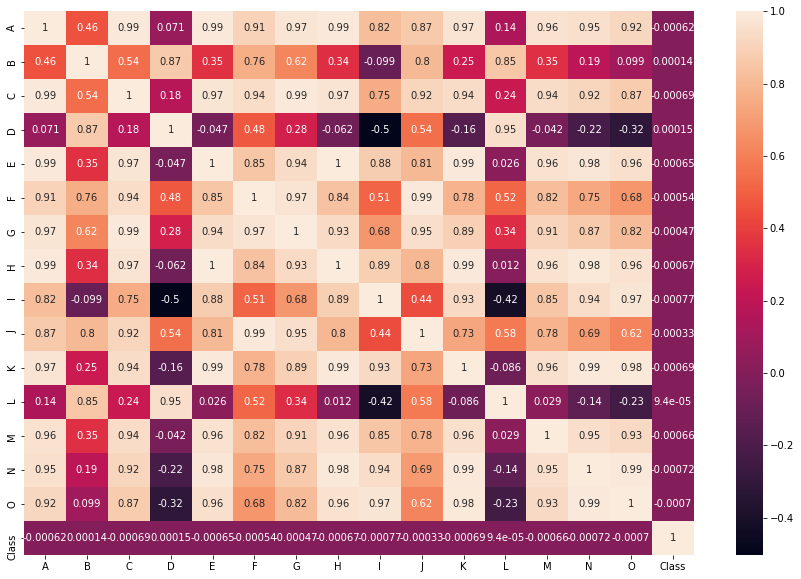

In [11]:
# Finding the correlation between the variables
corr_df=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_df, annot=True)

<i>The above diagram gives the correlation cofficients between the varibales. Positive and negative values indicate positivie and negative correlations respectively. The more the value is closer to 1, the more they are correlated. This diagram is bit confusing with duplicate values. Lets draw other matrix without duplicate values.</i>

<AxesSubplot:>

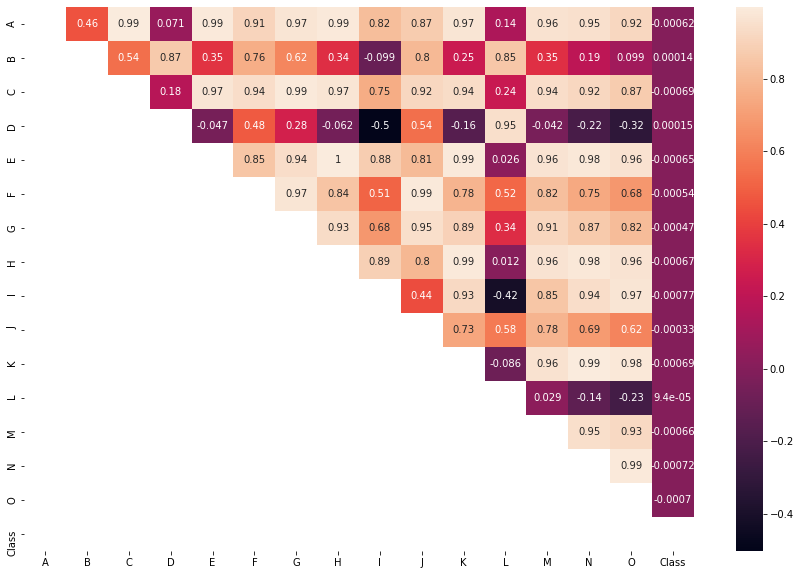

In [12]:
# Removing the duplicates
plt.figure(figsize=(15,10))
upper_corr = corr_df.where(np.triu(np.ones(corr_df.shape), k=1).astype(np.bool))
sns.heatmap(upper_corr, annot=True)

<i> As the duplicate values are removed, we can now find top 5 correlations easily. </i>

In [14]:
#Top 5  correlations
high_rel=upper_corr.unstack()
high_rel.sort_values(ascending=False)[0:5]

H  E    0.997116
N  K    0.992158
C  A    0.991999
K  H    0.990875
E  A    0.990703
dtype: float64

<i>So, the top five correlations are [H,E], [N,K], [C,A], [K,H], and [E,A]. Now, lets plot the pairs in scatter plot to see the data distribution.

<AxesSubplot:xlabel='H', ylabel='E'>

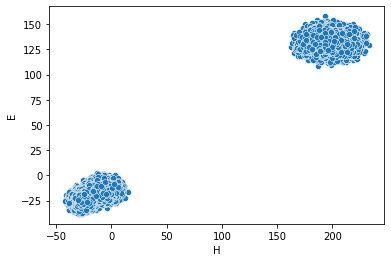

In [13]:
sns.scatterplot(x="H",y="E",data=df)

<AxesSubplot:xlabel='N', ylabel='K'>

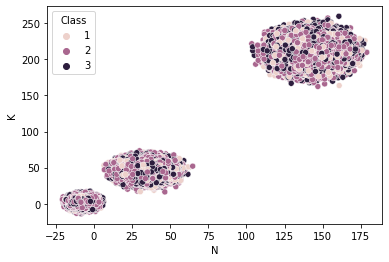

In [70]:
sns.scatterplot(x="N",y="K",data=df,hue=df["Class"])

<AxesSubplot:xlabel='A', ylabel='C'>

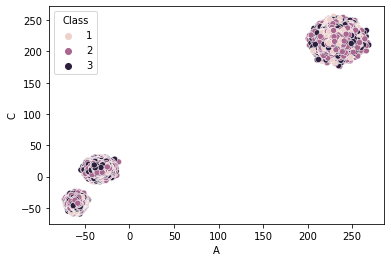

In [71]:
sns.scatterplot(x="A",y="C",data=df,hue=df["Class"])

<AxesSubplot:xlabel='K', ylabel='H'>

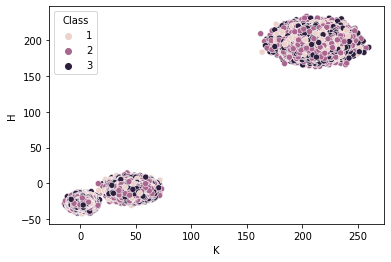

In [15]:
sns.scatterplot(x="K",y="H",data=df,hue=df["Class"])

<AxesSubplot:xlabel='E', ylabel='A'>

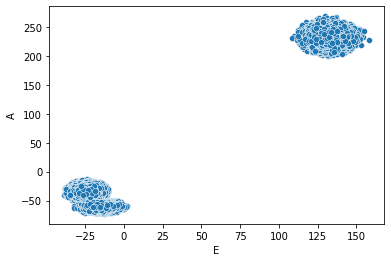

In [19]:
sns.scatterplot(x="E",y="A",data=df)

<i> As you can see, the data is in clustered form. This incdicates the data points are almost in  these variables and hence they are highly correlated.

<i>Now lets find if there are any outliers in the data. I am going to plot the variables in boxplot to see if they have outliers.

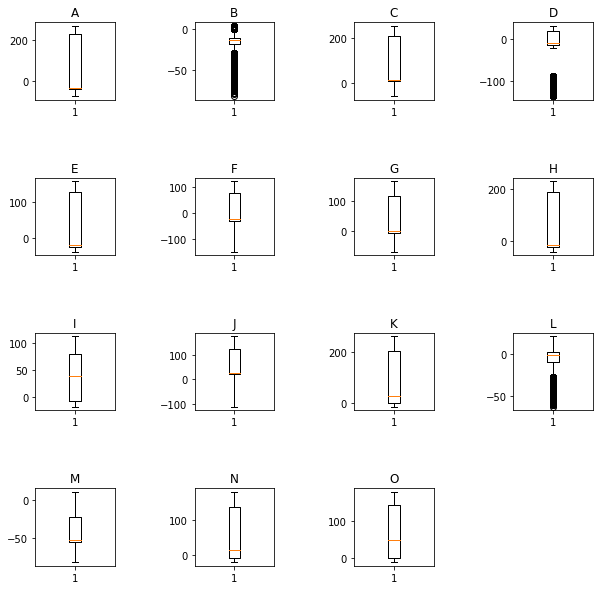

In [67]:
# ploting graph on all the features 
fig=plt.figure()
features=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O']
for i in range(1,16):
    fig.add_subplot(4,4,i)
    plt.boxplot(df[features[i-1]])
    plt.title(features[i-1])
fig.subplots_adjust(hspace=1, wspace=1)
fig.set_figheight(10)
fig.set_figwidth(10)

<i>We can see that B,D and L features have outliers.

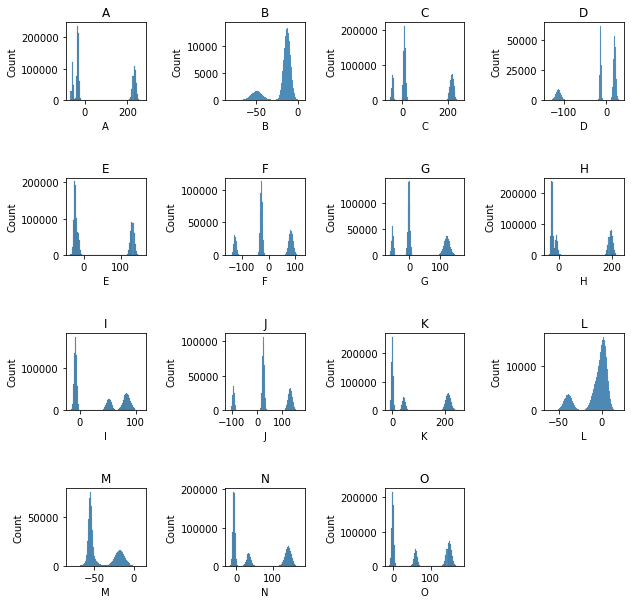

In [21]:
fig=plt.figure()
features=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O']
for i in range(1,16):
    fig.add_subplot(4,4,i)
    sns.histplot(df[features[i-1]])
    plt.title(features[i-1])
fig.subplots_adjust(hspace=1, wspace=1)
fig.set_figheight(10)
fig.set_figwidth(10)

<i>By visual analysis of the above diagram, we can say that pairs [N,O], [B,L], [C,G], [F,J] have high similarity.

Text(0, 0.5, 'Inertia')

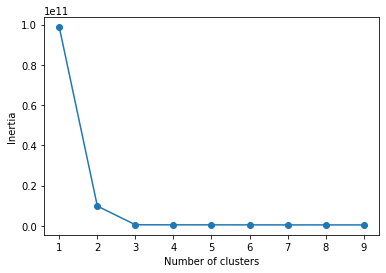

In [23]:
SSE = []

for cluster in range(1,10):
    kmeans = KMeans(n_clusters =cluster, init='k-means++')
    kmeans.fit(df.drop(["Class"],axis=1))
    SSE.append(kmeans.inertia_)
    
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

<i>As the scatterplots ploted above we could see that the dataset has divided in to 2 or 3 clusters. Since it was ploted only for few variables, I have perfomed K-means clustering on the entire dataset to check for the number of clusters formed. Above graph plots the sum of squared errors(SSE) for number of clusters. By the elbow method k=3. Hence, number of clusters the dataset forms is 3. 

### Model Training and Validation:

<i>We will split the data into training and testing set so that we can train our model using training set and calculate the model's accuracy using the test set.</i>

In [24]:
# Spliting data into training and test set
labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O']
X = pd.DataFrame(data=df.drop('Class',axis=1),columns=labels)
y = pd.DataFrame(data=df['Class'], columns=['Class'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
trainset = pd.concat([X_train,y_train],axis=1) 
trainset.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
365091,-31.463515,-21.872800,10.875470,21.068230,-29.832150,-28.840641,-1.569366,-23.078999,-5.684476,20.620386,-1.154866,-1.923279,-60.139052,-1.907344,6.431423,1
1073509,233.531780,-13.579849,214.540776,-13.395223,138.092770,87.251220,98.872710,182.751530,86.635727,141.853172,200.291889,-4.690688,-21.365382,142.364078,159.115530,1
564441,-34.949366,-12.511126,14.650558,22.413619,-23.273552,-28.275390,-2.771757,-28.165602,-6.173170,26.958097,-1.494841,2.188148,-58.467880,-1.611993,-3.372015,1
35049,-59.008605,-50.679772,-42.352400,-110.172056,-14.806678,-125.922087,-54.984541,-14.242202,49.321806,-89.123941,55.239218,-36.517672,-55.014266,33.638146,56.227701,2
1180696,-56.539177,-55.374165,-40.103730,-109.527185,-10.805082,-120.891619,-59.073483,-8.162685,58.626679,-93.645743,44.999413,-34.369959,-49.086665,33.897971,60.210950,2


<i>Above table represents sample records of training set. Since this data has large number of features, I wanted to reduce the number of dimensions using principle component analysis. But before that I wanted to how many dimensions to reduce so that it caputures 95% to 98% of variance of the data.

In [25]:
pca = PCA(0.98)
pca.fit(X_train)
print ("n_components PCA used to capture 98% variance is :",pca.n_components_)

n_components PCA used to capture 98% variance is : 2


In [26]:
pca = PCA(0.95)
pca.fit(X_train)
print ("n_components PCA used to capture 95% variance is :",pca.n_components_)

n_components PCA used to capture 95% variance is : 2


<i>As we have found out the number of components as 2, we will now apply the classifier algortithms on training data and calculate the accuray. I am going to use 3 different classifer algorithm to check which one gives highest accuracy.

In [27]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('lr_classifier',LogisticRegression(random_state=0))])
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('dt_classifier',DecisionTreeClassifier(max_depth=2))])
pipeline_rf=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('dt_classifier',RandomForestClassifier(n_estimators=100,max_depth=2))])

In [28]:
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf]
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest'}
for pipe in pipelines:
    pipe.fit(X_train, y_train)

C:\Users\91770\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\91770\anaconda3\lib\site-packages\sklearn\pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


In [31]:
for i,model in enumerate(pipelines):
    print("{} Training Accuracy: {}".format(pipe_dict[i],model.score(X_train,y_train)))

Logistic Regression Training Accuracy: 0.49947619047619046
Decision Tree Training Accuracy: 0.49947857142857144
RandomForest Training Accuracy: 0.49947619047619046


In [32]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Logistic Regression Test Accuracy: 0.4990777777777778
Decision Tree Test Accuracy: 0.499075
RandomForest Test Accuracy: 0.4990777777777778


<i>From the above results, the accuracy is almost same for all three classifier models. Now, we will check the if there will be any change in accuracy score if we remove the varibabels which have outliers from the training set.

<i>Now we are going to implement the models by removing the features which has outliers i.e. features excluding B,D,L

In [33]:
pipeline_lr_red=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('lr_classifier',LogisticRegression(random_state=0))])
pipeline_dt_red=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('dt_classifier',DecisionTreeClassifier(max_depth=2))])
pipeline_rf_red=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('dt_classifier',RandomForestClassifier(n_estimators=100,max_depth=2))])
pipelines_red = [pipeline_lr_red, pipeline_dt_red, pipeline_rf_red]
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest'}
X_train_reduced=X_train.drop(['B','D','L'], axis=1)
for pipe in pipelines_red:
    pipe.fit(X_train_reduced, y_train)

C:\Users\91770\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\91770\anaconda3\lib\site-packages\sklearn\pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


In [34]:
for i,model in enumerate(pipelines_red):
    print("{} Training Accuracy: {}".format(pipe_dict[i],model.score(X_train_reduced,y_train)))

Logistic Regression Training Accuracy: 0.49947619047619046
Decision Tree Training Accuracy: 0.49947619047619046
RandomForest Training Accuracy: 0.49947619047619046


In [35]:
X_test_reduced=X_test.drop(['B','D','L'], axis=1)
for i,model in enumerate(pipelines_red):
    print("{} Testing Accuracy: {}".format(pipe_dict[i],model.score(X_test_reduced,y_test)))

Logistic Regression Testing Accuracy: 0.4990777777777778
Decision Tree Testing Accuracy: 0.4990777777777778
RandomForest Testing Accuracy: 0.4990777777777778


<i>As per the above results there is no major difference on removing the features 'B','D'and 'L'. Clearly these features does not have effect. So I am going to try other method to find the effect on the accuracy score on removing highly correlated pairs.

In [36]:
X_train_corr=X_train.drop(['A', 'C', 'E', 'H', 'K', 'N'],axis=1)
X_test_corr=X_test.drop(['A', 'C', 'E', 'H', 'K', 'N'],axis=1)
pipeline_lr_corr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('lr_classifier',LogisticRegression(random_state=0))])
pipeline_dt_corr=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('dt_classifier',DecisionTreeClassifier(max_depth=2))])
pipeline_rf_corr=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('dt_classifier',RandomForestClassifier(n_estimators=100,max_depth=2))])
pipelines_corr = [pipeline_lr_corr, pipeline_dt_corr, pipeline_rf_corr]
for pipe in pipelines_corr:
    pipe.fit(X_train_corr, y_train)

C:\Users\91770\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\91770\anaconda3\lib\site-packages\sklearn\pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


In [37]:
for i,model in enumerate(pipelines_corr):
    print("{} Training Accuracy: {}".format(pipe_dict[i],model.score(X_train_corr,y_train)))

Logistic Regression Training Accuracy: 0.49947619047619046
Decision Tree Training Accuracy: 0.49947619047619046
RandomForest Training Accuracy: 0.49947619047619046


In [38]:
for i,model in enumerate(pipelines_corr):
    print("{} Testing Accuracy: {}".format(pipe_dict[i],model.score(X_test_corr,y_test)))

Logistic Regression Testing Accuracy: 0.4990777777777778
Decision Tree Testing Accuracy: 0.4990777777777778
RandomForest Testing Accuracy: 0.4990777777777778


<i> Still I could not see any significant effect on acuracy, so now I am keen check which feature has effect on accuracy. I am going to drop every feature and check the accuracy in my next step.

In [39]:
features = 'ABCDEFGHIJKLMNO'
for i in range(0, len(features)):
    pipeline_pmml = PMMLPipeline([
     ('mapper',
     DataFrameMapper([
         (X_train.columns.drop([features[i:i+1]]).values,
         [StandardScaler()])])),
         ('pca',
         PCA(n_components=2)),
         ('classifier',
         RandomForestClassifier(n_estimators=100,max_depth=2))
         ])
    
    pipeline_pmml.fit(trainset.drop([features[i:i+1]], axis=1),trainset['Class'])
    results = pipeline_pmml.predict(X_test)
    actual = np.concatenate(y_test.values)
    print("Dropped feature:", features[i:i+1], ", Accuracy:", metrics.accuracy_score(actual, results))


Dropped feature: A , Accuracy: 0.4990777777777778
Dropped feature: B , Accuracy: 0.4990777777777778
Dropped feature: C , Accuracy: 0.4990777777777778
Dropped feature: D , Accuracy: 0.4990777777777778
Dropped feature: E , Accuracy: 0.4990777777777778
Dropped feature: F , Accuracy: 0.4990777777777778
Dropped feature: G , Accuracy: 0.4990777777777778
Dropped feature: H , Accuracy: 0.4990777777777778
Dropped feature: I , Accuracy: 0.4990777777777778
Dropped feature: J , Accuracy: 0.4990777777777778
Dropped feature: K , Accuracy: 0.4990777777777778
Dropped feature: L , Accuracy: 0.4990777777777778
Dropped feature: M , Accuracy: 0.4990777777777778
Dropped feature: N , Accuracy: 0.4990777777777778
Dropped feature: O , Accuracy: 0.4990777777777778


<i>Clearly, there is no variable that has major effect on classification. To increase the test accuracy, I am going to try combination of multiple classifier models. AdaBoost combines multiple classifiers to increase the accuracy of classifiers. 

In [44]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


C:\Users\91770\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.4990111111111111


<i>As still I could see that there was no significant increase in accuracy, for further evaluation, I wanted to use Support Vector Classifier (SVC) base estimator.

In [ ]:
from sklearn.svm import SVC
svc=SVC(probability=True, kernel='linear')
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

**Note: As this code is running for more than 2hrs, I could not provide the output.

<i>As I could not improve the accuracy and all four models are giving same accuracy score, I have picked decision tree model to be my final model and before that I wanted to form the confusion matrix to check what values it is predicting corretly. 

In [43]:
y_pred=pipeline_dt.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[     0  59915      0]
 [     1 179667      0]
 [     0 120417      0]]


### Final ONNX model to deploy:

In [45]:
input_types = dict([(x, FloatTensorType([None, 1])) for x in X_train.columns.values])
model_onnx = convert_sklearn(pipeline_dt,'pipeline_dt_data_onnx',initial_types=list(input_types.items()))
with open("data_pipeline.onnx", "wb") as f:
    f.write(model_onnx.SerializeToString())

In [46]:
inputs_onnx = {k: np.array(v).astype(np.float32)[:, np.newaxis] for k, v in X_test.to_dict(orient='list').items()}

session_onnx = rt.InferenceSession("data_pipeline.onnx")
predict_onnx = session_onnx.run(None, inputs_onnx)
print("predict", predict_onnx[0])

predict [2 2 2 ... 2 2 2]


In [47]:
y_test.values.ravel()

array([3, 2, 3, ..., 3, 2, 2], dtype=int64)

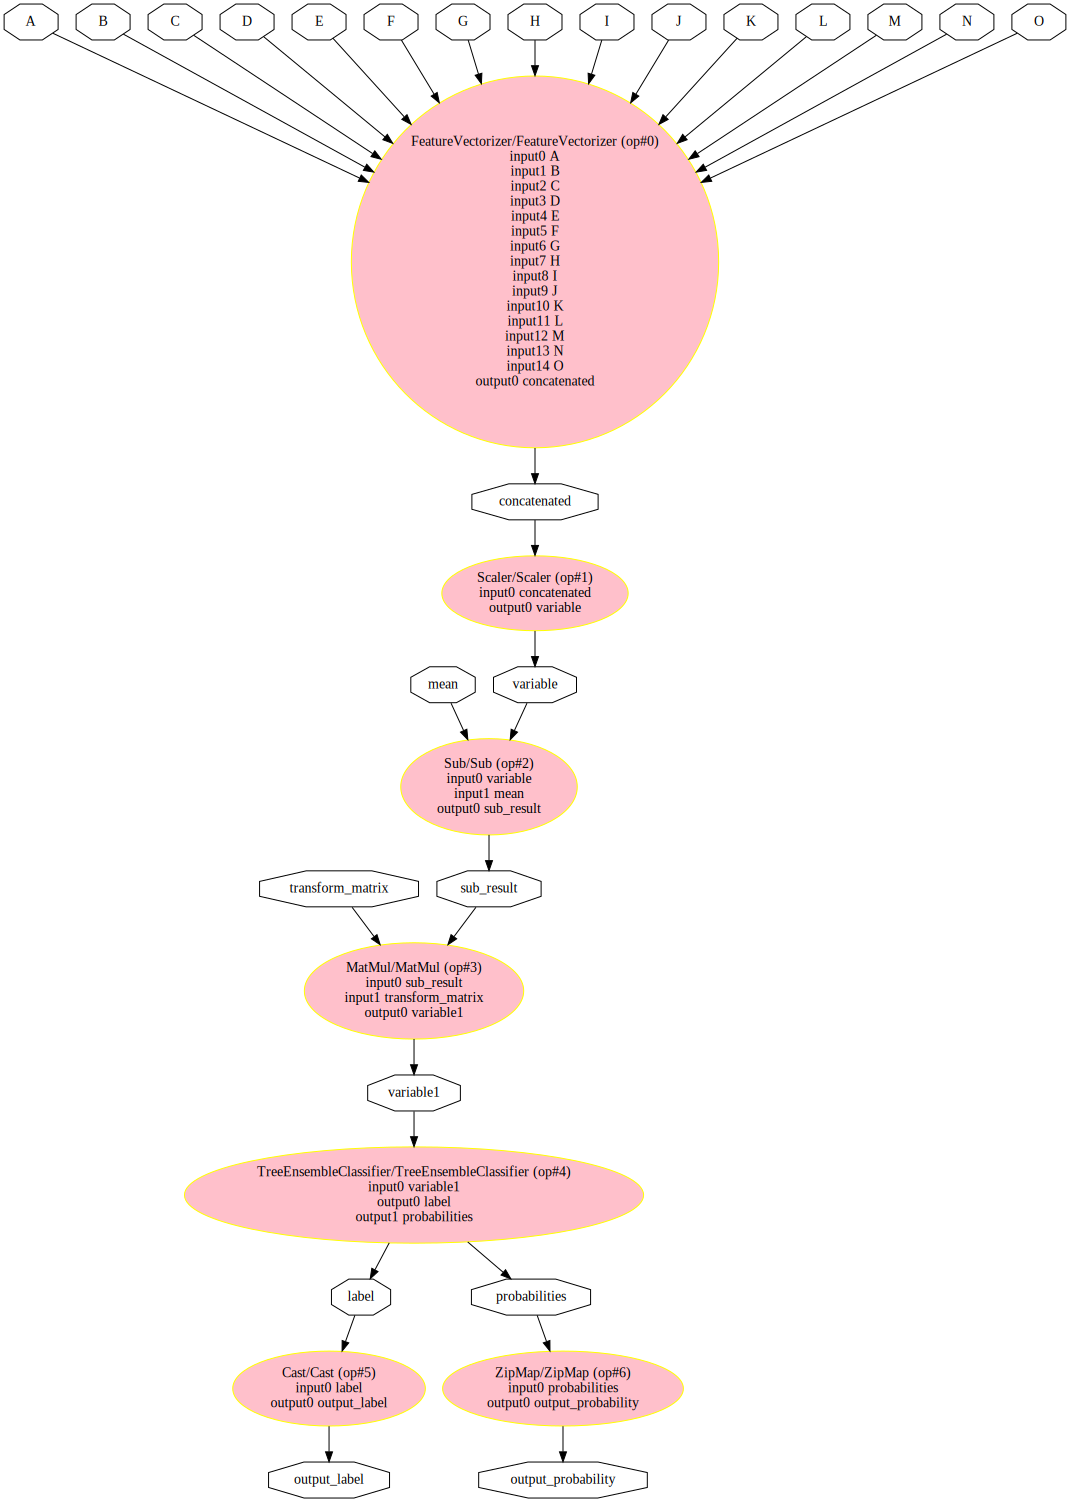

In [48]:
pydot_graph = GetPydotGraph(model_onnx.graph,
                            name=model_onnx.graph.name,
                            rankdir="TB",
                            node_producer=GetOpNodeProducer("docstring",
                                                            color="yellow",
                                                            fillcolor="pink",
                                                            style="filled"))

graphviz.Source(pydot_graph)

### Conclusion:

<i>From the analysis and modelling performed, I could see that the data is evenly distributed among the classes. I have tried various methods to increase the accuracy beyond 0.49, but the accuracy remained the same. By working on this project, I have learned how to use pipelines and multi-classifiers. In future, I hope to work more on this project and see if I can increase the accuracy score.



### References:

https://towardsdatascience.com/feature-extraction-techniques-d619b56e31be

https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python

https://www.datacamp.com/community/tutorials/adaboost-classifier-python
